In [1]:
%matplotlib inline

from IPython.display import display as d
from IPython.display import Image


import pandas as pd
import numpy as np
import seaborn as sns
sns.set(rc={'figure.figsize':(6,4)})
sns.set_style("white")
import glob
import json
import os
import sys
import json
import shutil
from pprint import pprint
import matplotlib.pyplot as plt


In [2]:
def read_json(x):
    with open(x) as xfp:
        j = json.load(xfp)
    r = []
    for c in j:
        c["db"] = os.path.basename(x).split(".")[0]
        r.append(c)
    return r



In [3]:
df = pd.DataFrame(
    sum(
        list(
            map(read_json, glob.glob("nima_appeal/*.json"))
        ), []
    )
)

In [4]:
df["db"] = df["db"].apply(lambda x: x.split("_", 1)[1])
d(df)

,image_id,mean_score_prediction,db
0,p21,5.170084,own
1,p23,5.243021,own
2,p25,5.867942,own
3,p24,5.027028,own
4,p20,5.836780,own
...,...,...,...
141,p10,4.391277,dall-e
142,p17,4.629117,dall-e
143,p09,5.225628,dall-e
144,p26,4.689971,dall-e


In [5]:
db_order = sorted(set(df["db"].values))
print(db_order)

['craiyon', 'dall-e', 'glide', 'midjourney', 'own', 'stable_diffusion']


In [6]:
def save_fig(ax, title, pdfname):
    ax.set_title(title)
    ax.get_figure().savefig(pdfname, bbox_inches="tight")


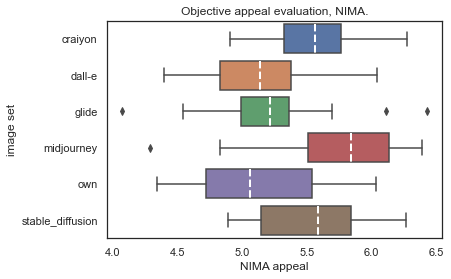

In [7]:
ax = sns.boxplot(x="mean_score_prediction", y="db", medianprops={"color": "white", "lw":2, "linestyle":"--"}, data=df, order=db_order)
ax.set_ylabel("image set")
ax.set_xlabel("NIMA appeal")
save_fig(ax, "Objective appeal evaluation, NIMA.", "nima_appeal.pdf")

In [8]:
df = pd.DataFrame(
    sum(
        list(
            map(read_json, glob.glob("nima_quality/*.json"))
        ), []
    )
)
df["db"] = df["db"].apply(lambda x: x.split("_", 1)[1])
d(df)

,image_id,mean_score_prediction,db
0,p02,5.591642,glide
1,p21,5.006300,glide
2,p11,5.037328,glide
3,p23,5.607345,glide
4,p25,4.489417,glide
...,...,...,...
141,p10,4.791872,midjourney
142,p17,4.154626,midjourney
143,p09,4.265830,midjourney
144,p26,5.097150,midjourney


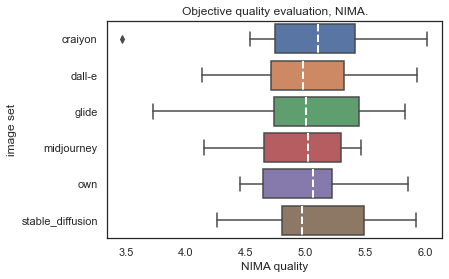

In [9]:
ax = sns.boxplot(x="mean_score_prediction", y="db",medianprops={"color": "white", "lw":2, "linestyle":"--"}, data=df, order=db_order)
ax.set_ylabel("image set")
ax.set_xlabel("NIMA quality")
save_fig(ax, "Objective quality evaluation, NIMA.", "nima_quality.pdf")

In [10]:
with open("ai_features.json") as xfp:
    nq = json.load(xfp)
    
dn = pd.DataFrame(nq)
dn["image"] = dn["image"].apply(
    lambda x:
        os.path.basename(os.path.dirname(x)) + "/" + os.path.basename(x)
)

dn["db"] = dn["image"].apply(
    lambda x:
        os.path.dirname(x)
)
dn["ID"] = dn["image"].apply(
    lambda x:
        x.split("/")[1].split(".")[0]
)
dn["IDnum"] = dn["image"].apply(
    lambda x:
       int(os.path.basename(x).split(".")[0].replace("p", ""))
)
d(dn)

,image,niqe,color_fulness,tone,blur,saturation,fft,si,contrast,noise,dominant_color,cpbd,blur_stength,db,ID,IDnum
0,craiyon/p01.png,20.658686,144.010318,0.939657,139300.407786,60.437065,52731.077843,0.366421,93.341072,0.670656,"[15, 13, 15]",0.824386,0.409098,craiyon,p01,1
1,craiyon/p02.png,18.071077,160.864403,0.682485,37190.178902,47.273052,46289.719948,0.297686,86.861719,0.747360,"[171, 199, 118]",0.568396,0.374859,craiyon,p02,2
2,craiyon/p03.png,17.088120,165.274028,0.834870,55539.989689,47.667258,49265.125347,0.354535,95.627120,1.121851,"[13, 12, 16]",0.815029,0.299767,craiyon,p03,3
3,craiyon/p04.png,20.405674,139.607826,0.762945,5866.658558,71.409860,38881.642609,0.118574,91.062077,0.537206,"[29, 13, 6]",0.552941,0.604691,craiyon,p04,4
4,craiyon/p05.png,20.048519,69.004949,0.712958,105528.234721,26.548054,48536.680952,0.375545,87.806314,0.807511,"[195, 173, 142]",0.815621,0.411801,craiyon,p05,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141,stable_diffusion/p23.png,18.996328,139.300242,0.560965,32841.334573,33.997242,21935.690084,0.232472,92.866035,1.597282,"[110, 134, 107]",0.962264,0.367075,stable_diffusion,p23,23
142,stable_diffusion/p24.png,17.763029,83.123848,0.857133,561097.386581,5.276774,25300.867946,0.595288,89.188444,5.582210,"[59, 57, 58]",0.939130,0.220531,stable_diffusion,p24,24
143,stable_diffusion/p25.png,17.878279,132.481062,0.665555,53538.702361,29.002990,22812.058538,0.355601,87.527195,1.855035,"[115, 114, 126]",0.967742,0.278682,stable_diffusion,p25,25
144,stable_diffusion/p26.png,16.312225,165.896037,0.792398,194349.413456,55.888866,27111.152884,0.519960,85.056767,8.329579,"[128, 168, 55]",0.989130,0.263289,stable_diffusion,p26,26


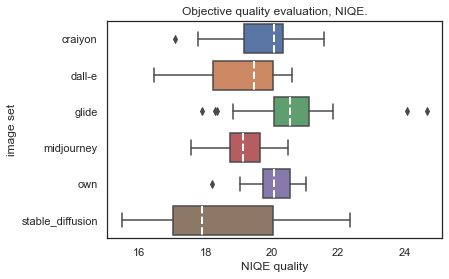

In [11]:
ax = sns.boxplot(x="niqe", y="db", data=dn,medianprops={"color": "white", "lw":2, "linestyle":"--"}, order=db_order)
ax.set_ylabel("image set")
ax.set_xlabel("NIQE quality")
save_fig(ax, "Objective quality evaluation, NIQE.", "niqe_quality.pdf")


In [12]:
# checkout rule predictions
def read_json(x):
    with open(x) as xfp:
        j = json.load(xfp)
    return j

def read_rule(path):
    dr = pd.DataFrame(
        sum(
            list(
                map(read_json, glob.glob(path))
            ), []
        )
    )
    dr["db"] = dr["image"].apply(lambda x: x.split("/")[2]) 
    return dr

dr = read_rule("rules/rule_of_thirds/*.json")
dr["rule"] = "rule of thirds"
d(dr)

,image,prediction,db,rule
0,../stimuli/stable_diffusion/p02.png,2.306900e-08,stable_diffusion,rule of thirds
1,../stimuli/stable_diffusion/p21.png,9.947462e-01,stable_diffusion,rule of thirds
2,../stimuli/stable_diffusion/p11.png,2.233960e-15,stable_diffusion,rule of thirds
3,../stimuli/stable_diffusion/p23.png,5.318770e-05,stable_diffusion,rule of thirds
4,../stimuli/stable_diffusion/p25.png,2.724833e-15,stable_diffusion,rule of thirds
...,...,...,...,...
141,../stimuli/craiyon/p10.png,3.551058e-05,craiyon,rule of thirds
142,../stimuli/craiyon/p17.png,1.032572e-05,craiyon,rule of thirds
143,../stimuli/craiyon/p09.png,9.966522e-01,craiyon,rule of thirds
144,../stimuli/craiyon/p26.png,4.340287e-09,craiyon,rule of thirds


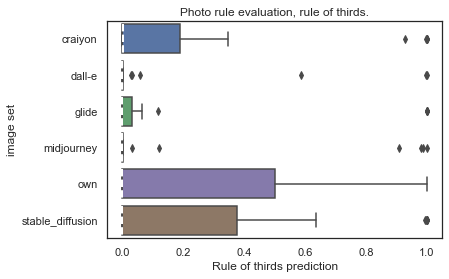

In [13]:
ax = sns.boxplot(x="prediction", y="db", data=dr,medianprops={"color": "white", "lw":2, "linestyle":"--"}, order=db_order)
ax.set_ylabel("image set")
ax.set_xlabel("Rule of thirds prediction")
save_fig(ax, "Photo rule evaluation, rule of thirds.", "rule_of_thids.pdf")

In [14]:
ds = read_rule("rules/simplicity/*.json")
ds["rule"] = "simplicity" 
d(ds)

,image,prediction,db,rule
0,../stimuli/stable_diffusion/p02.png,8.033221e-01,stable_diffusion,simplicity
1,../stimuli/stable_diffusion/p21.png,1.000000e+00,stable_diffusion,simplicity
2,../stimuli/stable_diffusion/p11.png,9.729412e-01,stable_diffusion,simplicity
3,../stimuli/stable_diffusion/p23.png,5.863547e-03,stable_diffusion,simplicity
4,../stimuli/stable_diffusion/p25.png,5.829782e-11,stable_diffusion,simplicity
...,...,...,...,...
141,../stimuli/craiyon/p10.png,7.092702e-02,craiyon,simplicity
142,../stimuli/craiyon/p17.png,2.708071e-06,craiyon,simplicity
143,../stimuli/craiyon/p09.png,1.674771e-03,craiyon,simplicity
144,../stimuli/craiyon/p26.png,8.047394e-07,craiyon,simplicity


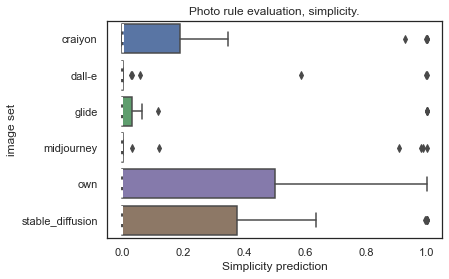

In [15]:
ax = sns.boxplot(x="prediction", y="db", data=dr, medianprops={"color": "white", "lw":2, "linestyle":"--"}, order=db_order)
ax.set_ylabel("image set")
ax.set_xlabel("Simplicity prediction")
save_fig(ax, "Photo rule evaluation, simplicity.", "simplicity.pdf")

,image,prediction,db,rule
0,../stimuli/stable_diffusion/p02.png,8.033221e-01,stable_diffusion,simplicity
1,../stimuli/stable_diffusion/p21.png,1.000000e+00,stable_diffusion,simplicity
2,../stimuli/stable_diffusion/p11.png,9.729412e-01,stable_diffusion,simplicity
3,../stimuli/stable_diffusion/p23.png,5.863547e-03,stable_diffusion,simplicity
4,../stimuli/stable_diffusion/p25.png,5.829782e-11,stable_diffusion,simplicity
...,...,...,...,...
287,../stimuli/craiyon/p10.png,3.551058e-05,craiyon,rule of thirds
288,../stimuli/craiyon/p17.png,1.032572e-05,craiyon,rule of thirds
289,../stimuli/craiyon/p09.png,9.966522e-01,craiyon,rule of thirds
290,../stimuli/craiyon/p26.png,4.340287e-09,craiyon,rule of thirds


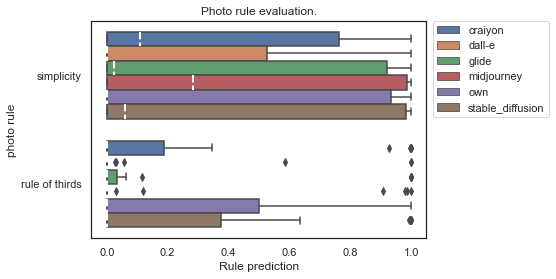

In [16]:
drules = pd.concat([ds, dr], ignore_index=True)
d(drules)

ax = sns.boxplot(x="prediction", y="rule", hue="db", medianprops={"color": "white", "lw":2, "linestyle":"--"},  data=drules, hue_order=db_order)

plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

ax.set_ylabel("photo rule")
ax.set_xlabel("Rule prediction")
save_fig(ax, "Photo rule evaluation.", "rules.pdf")